In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('copy of flights.csv')

C:\Users\lokes\.conda\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(5819079, 31)

In [27]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [6]:
#analyze the data
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [26]:
 df_sample = df.sample(n=580000)

In [28]:
df_sample.shape

(580000, 31)

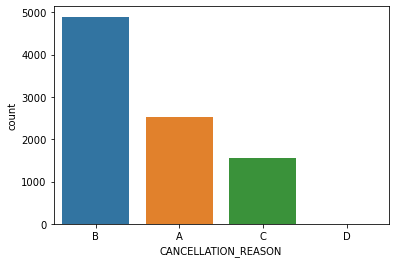

In [12]:
sns.countplot(x="CANCELLATION_REASON",data=df_sample)

Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
We can observe from graph easily that mostly Whether is responsible for delays of flight.

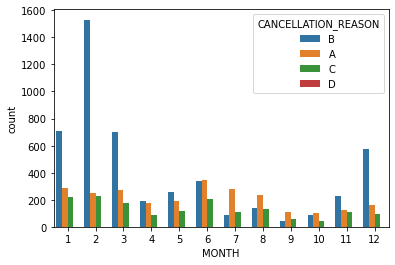

In [16]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=df_sample)

In [9]:
df_sample.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER              1495
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME           8610
DEPARTURE_DELAY          8610
TAXI_OUT                 8918
WHEELS_OFF               8918
SCHEDULED_TIME              1
ELAPSED_TIME            10513
AIR_TIME                10513
DISTANCE                    0
WHEELS_ON                9235
TAXI_IN                  9235
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME             9235
ARRIVAL_DELAY           10513
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    571011
AIR_SYSTEM_DELAY       474053
SECURITY_DELAY         474053
AIRLINE_DELAY          474053
LATE_AIRCRAFT_DELAY    474053
WEATHER_DELAY          474053
dtype: int64

In [11]:
df_sample.isnull().sum()*100/df_sample.shape[0]

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.257759
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.484483
DEPARTURE_DELAY         1.484483
TAXI_OUT                1.537586
WHEELS_OFF              1.537586
SCHEDULED_TIME          0.000172
ELAPSED_TIME            1.812586
AIR_TIME                1.812586
DISTANCE                0.000000
WHEELS_ON               1.592241
TAXI_IN                 1.592241
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.592241
ARRIVAL_DELAY           1.812586
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.450172
AIR_SYSTEM_DELAY       81.733276
SECURITY_DELAY         81.733276
AIRLINE_DELAY          81.733276
LATE_AIRCRAFT_DELAY    81.733276
WEATHER_DE

We can see that 96% of the values in Cancellation reason column are null for which it is of less use while predicting Delays. Some other columns include 78.2% in Air System Delay, Security Delay, Airline Delay, Weather Delay etc. So I am going to create two Dataset which is having no null values one is by removing all the null values irrespective of different types of Delays and other I am going to take the data set with respect to different types of delays. The first Dataset is named as Flights and the other one is named as Flight_Delays.



In [29]:
# Dropping of subset of null values
data1 = df_sample.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [30]:
data1.shape

(569327, 31)

In [31]:
data1.isnull().sum()


YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
TAXI_OUT                    0
WHEELS_OFF                  0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_TIME                    0
DISTANCE                    0
WHEELS_ON                   0
TAXI_IN                     0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
ARRIVAL_DELAY               0
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    569327
AIR_SYSTEM_DELAY       463184
SECURITY_DELAY         463184
AIRLINE_DELAY          463184
LATE_AIRCRAFT_DELAY    463184
WEATHER_DELAY          463184
dtype: int64

In [32]:
data1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
126030,2015,1,9,5,DL,2288,N918DE,BHM,ATL,525,...,733.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
124110,2015,1,8,4,DL,2325,N968AT,DTW,EWR,1935,...,2224.0,59.0,0,0,NaN,26.0,0.0,0.0,27.0,6.0
4493412,2015,10,7,3,EV,2839,N901EV,11298,10868,1830,...,2141.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4967729,2015,11,6,5,AA,509,N680AW,PHX,LAX,1955,...,2010.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5671140,2015,12,22,2,EV,4995,N724EV,PHL,DTW,942,...,1131.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Creting Dataset w.r.t different Types of Delays
data11 = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
data11 = data11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [34]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106143 entries, 124110 to 5761671
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AIRLINE              106143 non-null  object 
 1   ORIGIN_AIRPORT       106143 non-null  object 
 2   DESTINATION_AIRPORT  106143 non-null  object 
 3   DEPARTURE_DELAY      106143 non-null  float64
 4   TAXI_OUT             106143 non-null  float64
 5   ELAPSED_TIME         106143 non-null  float64
 6   DISTANCE             106143 non-null  int64  
 7   TAXI_IN              106143 non-null  float64
 8   ARRIVAL_DELAY        106143 non-null  float64
 9   AIR_SYSTEM_DELAY     106143 non-null  float64
 10  SECURITY_DELAY       106143 non-null  float64
 11  AIRLINE_DELAY        106143 non-null  float64
 12  LATE_AIRCRAFT_DELAY  106143 non-null  float64
 13  WEATHER_DELAY        106143 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 12.1+ MB


In [35]:
# The other Dataset
Flight_Delays = data11

In [36]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [37]:
data2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [38]:
data2.shape

(569327, 25)

In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569327 entries, 126030 to 2142579
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 569327 non-null  int64  
 1   MONTH                569327 non-null  int64  
 2   DAY                  569327 non-null  int64  
 3   DAY_OF_WEEK          569327 non-null  int64  
 4   AIRLINE              569327 non-null  object 
 5   FLIGHT_NUMBER        569327 non-null  int64  
 6   TAIL_NUMBER          569327 non-null  object 
 7   ORIGIN_AIRPORT       569327 non-null  object 
 8   DESTINATION_AIRPORT  569327 non-null  object 
 9   SCHEDULED_DEPARTURE  569327 non-null  int64  
 10  DEPARTURE_TIME       569327 non-null  float64
 11  DEPARTURE_DELAY      569327 non-null  float64
 12  TAXI_OUT             569327 non-null  float64
 13  WHEELS_OFF           569327 non-null  float64
 14  SCHEDULED_TIME       569327 non-null  float64
 15  ELAPSED_TIM

In [40]:
data2.DEPARTURE_TIME.isnull().sum()

0

In [41]:
data2.DEPARTURE_TIME.dtype

dtype('float64')

In [42]:
data2.DEPARTURE_TIME

126030      522.0
124110     2008.0
4493412    1827.0
4967729    1954.0
5671140     943.0
            ...  
362155     1820.0
5227150    1408.0
5239393    1121.0
1997347    1731.0
2142579    1744.0
Name: DEPARTURE_TIME, Length: 569327, dtype: float64

In [45]:
import datetime, warnings, scipy 

The departure time above is not very much informative so we are going to change it in the datetime format so that we get a better idea of the time.



In [43]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [46]:
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Actual_Departure']

126030     05:22:00
124110     20:08:00
4493412    18:27:00
4967729    19:54:00
5671140    09:43:00
             ...   
362155     18:20:00
5227150    14:08:00
5239393    11:21:00
1997347    17:31:00
2142579    17:44:00
Name: Actual_Departure, Length: 569327, dtype: object

In [47]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure'],
      dtype='object')

In [48]:
data2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,Actual_Departure
126030,2015,1,9,5,DL,2288,N918DE,BHM,ATL,525,...,29.0,134,717.0,16.0,725,733.0,8.0,0,0,05:22:00
124110,2015,1,8,4,DL,2325,N968AT,DTW,EWR,1935,...,67.0,488,2219.0,5.0,2125,2224.0,59.0,0,0,20:08:00
4493412,2015,10,7,3,EV,2839,N901EV,11298,10868,1830,...,116.0,922,2137.0,4.0,2156,2141.0,-15.0,0,0,18:27:00
4967729,2015,11,6,5,AA,509,N680AW,PHX,LAX,1955,...,54.0,370,2003.0,7.0,2027,2010.0,-17.0,0,0,19:54:00
5671140,2015,12,22,2,EV,4995,N724EV,PHL,DTW,942,...,85.0,453,1126.0,5.0,1130,1131.0,1.0,0,0,09:43:00


In [49]:
# Creating Date in the Datetime format
data2['Date'] = pd.to_datetime(data2[['YEAR','MONTH','DAY']])
data2.Date

126030    2015-01-09
124110    2015-01-08
4493412   2015-10-07
4967729   2015-11-06
5671140   2015-12-22
             ...    
362155    2015-01-24
5227150   2015-11-23
5239393   2015-11-24
1997347   2015-05-07
2142579   2015-05-16
Name: Date, Length: 569327, dtype: datetime64[ns]

In [50]:
data2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,Actual_Departure,Date
126030,2015,1,9,5,DL,2288,N918DE,BHM,ATL,525,...,134,717.0,16.0,725,733.0,8.0,0,0,05:22:00,2015-01-09
124110,2015,1,8,4,DL,2325,N968AT,DTW,EWR,1935,...,488,2219.0,5.0,2125,2224.0,59.0,0,0,20:08:00,2015-01-08
4493412,2015,10,7,3,EV,2839,N901EV,11298,10868,1830,...,922,2137.0,4.0,2156,2141.0,-15.0,0,0,18:27:00,2015-10-07
4967729,2015,11,6,5,AA,509,N680AW,PHX,LAX,1955,...,370,2003.0,7.0,2027,2010.0,-17.0,0,0,19:54:00,2015-11-06
5671140,2015,12,22,2,EV,4995,N724EV,PHL,DTW,942,...,453,1126.0,5.0,1130,1131.0,1.0,0,0,09:43:00,2015-12-22


In [54]:
# Applying the function to required variables in the dataset
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data2['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data2['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)

In [55]:
data2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,Actual_Departure,Date,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival
126030,2015,1,9,5,DL,2288,N918DE,BHM,ATL,525,...,725,733.0,8.0,0,0,05:22:00,2015-01-09,07:25:00,05:25:00,07:33:00
124110,2015,1,8,4,DL,2325,N968AT,DTW,EWR,1935,...,2125,2224.0,59.0,0,0,20:08:00,2015-01-08,21:25:00,19:35:00,22:24:00
4493412,2015,10,7,3,EV,2839,N901EV,11298,10868,1830,...,2156,2141.0,-15.0,0,0,18:27:00,2015-10-07,21:56:00,18:30:00,21:41:00
4967729,2015,11,6,5,AA,509,N680AW,PHX,LAX,1955,...,2027,2010.0,-17.0,0,0,19:54:00,2015-11-06,20:27:00,19:55:00,20:10:00
5671140,2015,12,22,2,EV,4995,N724EV,PHL,DTW,942,...,1130,1131.0,1.0,0,0,09:43:00,2015-12-22,11:30:00,09:42:00,11:31:00


In [59]:
#Dropping unnecessary column 
data2.drop("YEAR",axis=1,inplace=True)

In [60]:
#Dopping cabin column beacuse its no use
data2.drop("MONTH",axis=1,inplace=True)

In [61]:
data2.drop("DAY",axis=1,inplace=True)

In [62]:
data2.drop("DAY_OF_WEEK",axis=1,inplace=True)

In [63]:
data2.head()

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,Actual_Departure,Date,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival
126030,DL,2288,N918DE,BHM,ATL,525,522.0,-3.0,26.0,548.0,...,725,733.0,8.0,0,0,05:22:00,2015-01-09,07:25:00,05:25:00,07:33:00
124110,DL,2325,N968AT,DTW,EWR,1935,2008.0,33.0,64.0,2112.0,...,2125,2224.0,59.0,0,0,20:08:00,2015-01-08,21:25:00,19:35:00,22:24:00
4493412,EV,2839,N901EV,11298,10868,1830,1827.0,-3.0,14.0,1841.0,...,2156,2141.0,-15.0,0,0,18:27:00,2015-10-07,21:56:00,18:30:00,21:41:00
4967729,AA,509,N680AW,PHX,LAX,1955,1954.0,-1.0,15.0,2009.0,...,2027,2010.0,-17.0,0,0,19:54:00,2015-11-06,20:27:00,19:55:00,20:10:00
5671140,EV,4995,N724EV,PHL,DTW,942,943.0,1.0,18.0,1001.0,...,1130,1131.0,1.0,0,0,09:43:00,2015-12-22,11:30:00,09:42:00,11:31:00


In [64]:
data2.drop("DEPARTURE_TIME",axis=1,inplace=True)

In [65]:
data2.drop("SCHEDULED_DEPARTURE",axis=1,inplace=True)

In [66]:
data2.drop("SCHEDULED_ARRIVAL",axis=1,inplace=True)

In [67]:
data2.drop("ARRIVAL_TIME",axis=1,inplace=True)

In [69]:
data2.columns

Index(['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Actual_Departure',
       'Date', 'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival'],
      dtype='object')

In [70]:
Flights = data2

In [71]:
Flights.head()

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,WHEELS_ON,TAXI_IN,ARRIVAL_DELAY,DIVERTED,CANCELLED,Actual_Departure,Date,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival
126030,DL,2288,N918DE,BHM,ATL,-3.0,26.0,548.0,60.0,71.0,...,717.0,16.0,8.0,0,0,05:22:00,2015-01-09,07:25:00,05:25:00,07:33:00
124110,DL,2325,N968AT,DTW,EWR,33.0,64.0,2112.0,110.0,136.0,...,2219.0,5.0,59.0,0,0,20:08:00,2015-01-08,21:25:00,19:35:00,22:24:00
4493412,EV,2839,N901EV,11298,10868,-3.0,14.0,1841.0,146.0,134.0,...,2137.0,4.0,-15.0,0,0,18:27:00,2015-10-07,21:56:00,18:30:00,21:41:00
4967729,AA,509,N680AW,PHX,LAX,-1.0,15.0,2009.0,92.0,76.0,...,2003.0,7.0,-17.0,0,0,19:54:00,2015-11-06,20:27:00,19:55:00,20:10:00
5671140,EV,4995,N724EV,PHL,DTW,1.0,18.0,1001.0,108.0,108.0,...,1126.0,5.0,1.0,0,0,09:43:00,2015-12-22,11:30:00,09:42:00,11:31:00


In [72]:
Flights.isnull().sum()

AIRLINE                  0
FLIGHT_NUMBER            0
TAIL_NUMBER              0
ORIGIN_AIRPORT           0
DESTINATION_AIRPORT      0
DEPARTURE_DELAY          0
TAXI_OUT                 0
WHEELS_OFF               0
SCHEDULED_TIME           0
ELAPSED_TIME             0
AIR_TIME                 0
DISTANCE                 0
WHEELS_ON                0
TAXI_IN                  0
ARRIVAL_DELAY            0
DIVERTED                 0
CANCELLED                0
Actual_Departure        49
Date                     0
Scheduled_Arrival        0
Scheduled_Departure      0
Actual_Arrival         260
dtype: int64

In [75]:
Flights.Actual_Departure.isnull().sum()

49

In [76]:
Flights.dropna(inplace=True)

In [77]:
Flights.shape

(569018, 22)

In [79]:
Flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569018 entries, 126030 to 2142579
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AIRLINE              569018 non-null  object        
 1   FLIGHT_NUMBER        569018 non-null  int64         
 2   TAIL_NUMBER          569018 non-null  object        
 3   ORIGIN_AIRPORT       569018 non-null  object        
 4   DESTINATION_AIRPORT  569018 non-null  object        
 5   DEPARTURE_DELAY      569018 non-null  float64       
 6   TAXI_OUT             569018 non-null  float64       
 7   WHEELS_OFF           569018 non-null  float64       
 8   SCHEDULED_TIME       569018 non-null  float64       
 9   ELAPSED_TIME         569018 non-null  float64       
 10  AIR_TIME             569018 non-null  float64       
 11  DISTANCE             569018 non-null  int64         
 12  WHEELS_ON            569018 non-null  float64       
 13  TAXI_IN 

In [84]:
#save filtered clean dataset to my system in csv format
Flights.to_csv("C:/Users/lokes/OneDrive/Desktop/p25/Flights.csv")

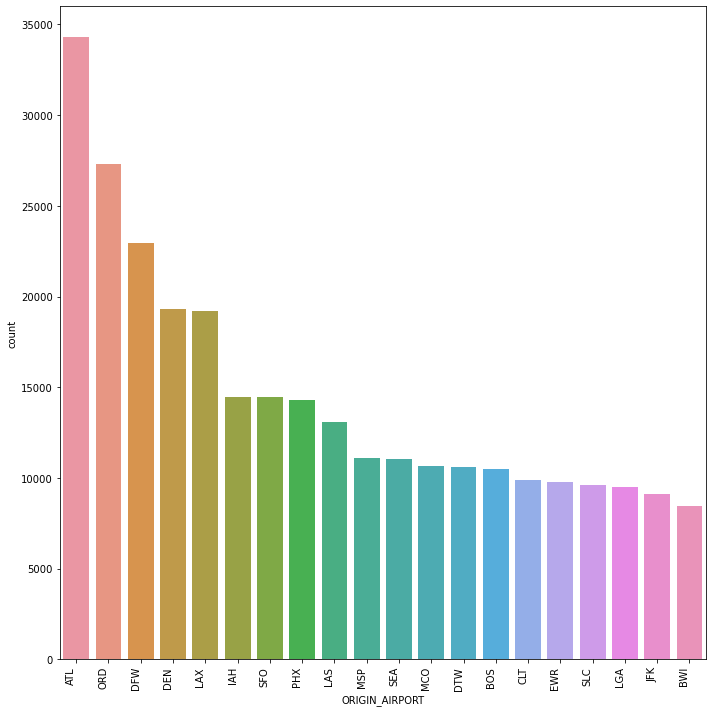

In [86]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['ORIGIN_AIRPORT'], data = Flights,
              order=Flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

The Figure shows that Atlanta has the highest count of flight from origin city

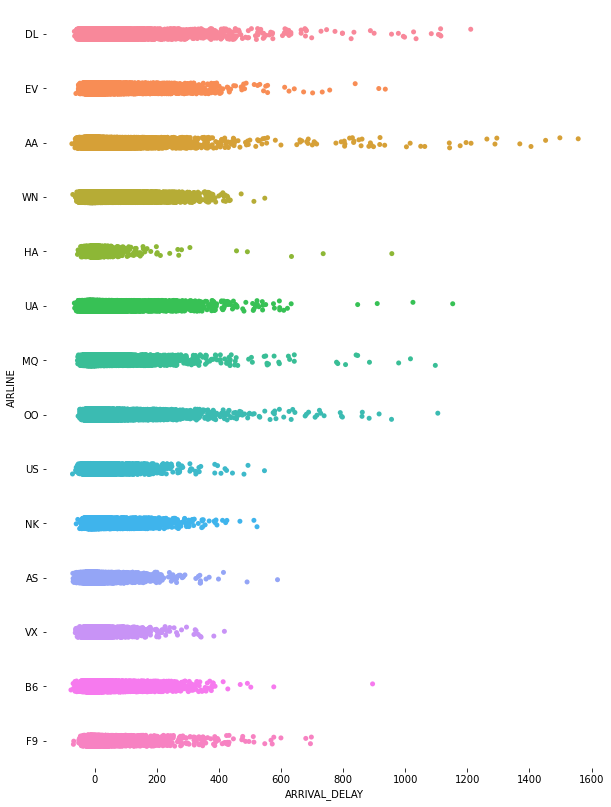

In [89]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = Flights, dodge=True, jitter=True
            )
plt.show()

American Airlines Inc has the highest Arrival Delay.



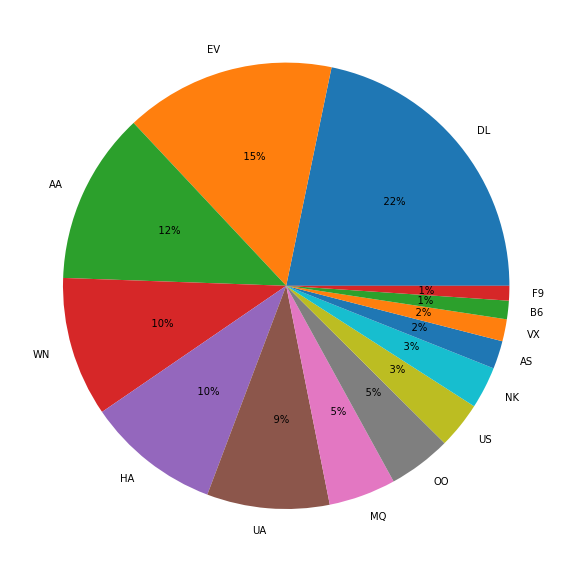

In [90]:
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

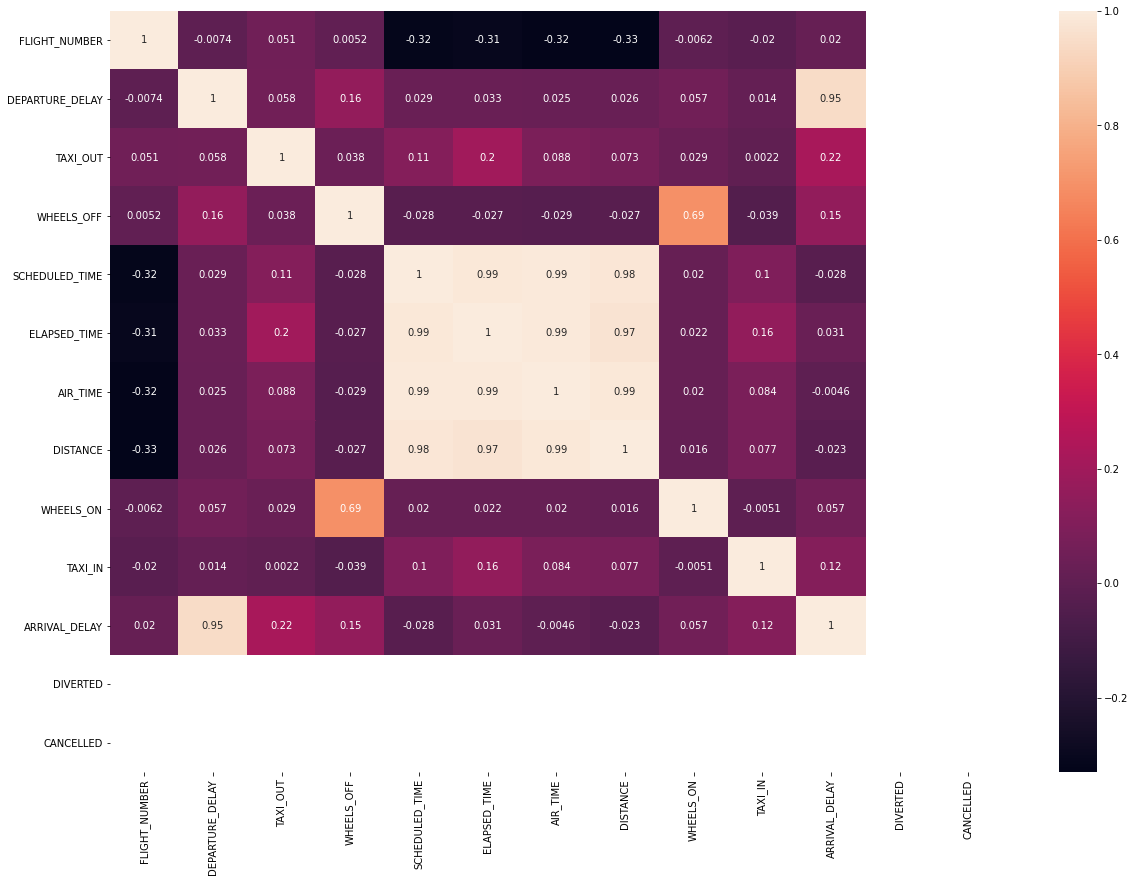

In [92]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(Flights.corr(),annot = True)
plt.show()

# Very High Correlation Between Arrival Delay and Departure Delay
It shows that maximum of the Arrival Delays are due to the Departure Delays.

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)')]

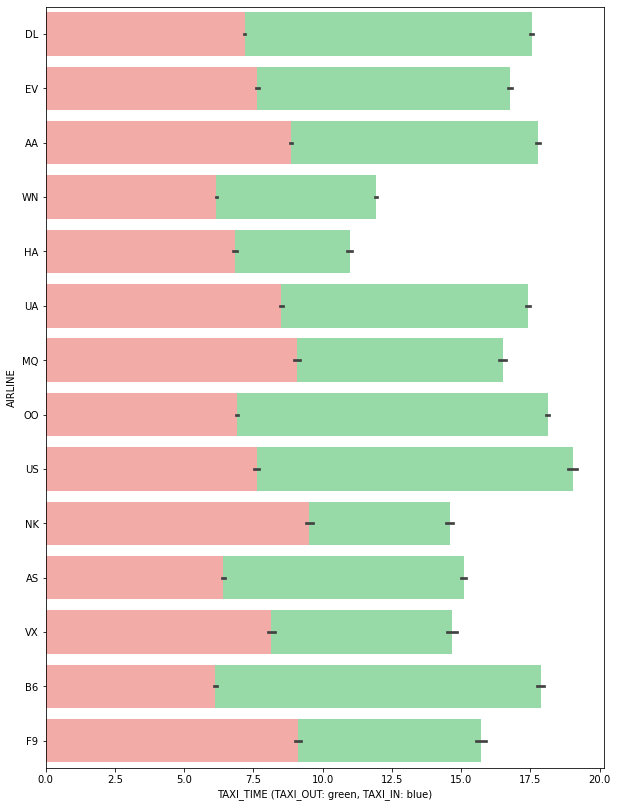

In [93]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(10,14))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=Flights, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=Flights, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)")

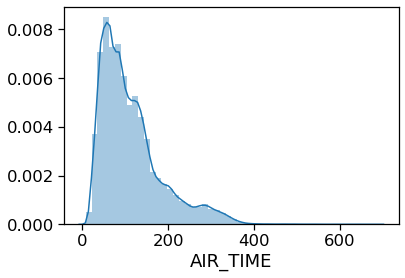

In [95]:
# To check the Distribution of Air Time
sns.distplot(Flights['AIR_TIME'])
plt.show()

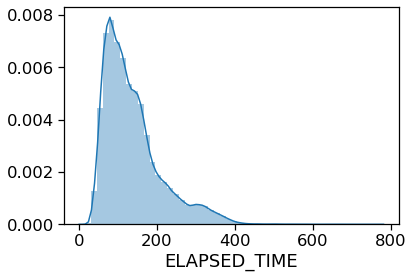

In [96]:
# To check the Distribution of Elapsed Time
sns.distplot(Flights['ELAPSED_TIME'])
plt.show()